# FinTechCo Quick Start Analysis

This notebook provides a quick start guide for exploring the FinTechCo demonstration environment.

## Contents
1. Load and explore synthetic transaction data
2. Analyze FRED macroeconomic indicators
3. Combine internal and external data
4. Visualize key relationships
5. Model performance review

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded successfully!")

Libraries loaded successfully!


## 1. Load and Explore Synthetic Transaction Data

In [2]:
# Load payment transactions
transactions = pd.read_csv('../data/synthetic/payment_transactions.csv')
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])

print(f"Total Transactions: {len(transactions):,}")
print(f"Date Range: {transactions['transaction_date'].min().date()} to {transactions['transaction_date'].max().date()}")
print(f"\nFirst few rows:")
transactions.head()

Total Transactions: 50,000
Date Range: 2022-01-04 to 2025-11-27

First few rows:


,transaction_id,customer_id,transaction_date,transaction_type,amount,merchant_category,payment_method,location,device_type,status
0,TXN00013075,98815,2022-01-04,withdrawal,80.00,atm,credit_card,San Antonio,desktop,completed
1,TXN00009810,68601,2022-01-08,withdrawal,100.00,atm,bank_transfer,Austin,pos_terminal,completed
2,TXN00042450,16026,2022-01-10,withdrawal,40.00,atm,credit_card,Boston,mobile,completed
3,TXN00040032,71378,2022-01-11,refund,13.86,refund,credit_card,San Jose,mobile,completed
4,TXN00021067,95439,2022-01-12,purchase,29.96,restaurants,credit_card,Phoenix,mobile,completed


In [3]:
# Basic statistics
print("Transaction Amount Statistics:")
print(transactions['amount'].describe())

print("\nTransaction Type Distribution:")
print(transactions['transaction_type'].value_counts())

print("\nPayment Method Distribution:")
print(transactions['payment_method'].value_counts())

Transaction Amount Statistics:
count    50000.000000
mean       154.947316
std        533.652714
min          0.220000
25%         20.790000
50%         54.035000
75%        120.162500
max      27052.920000
Name: amount, dtype: float64

Transaction Type Distribution:
transaction_type
purchase      24990
transfer       9988
withdrawal     7446
payment        5092
refund         2484
Name: count, dtype: int64

Payment Method Distribution:
payment_method
credit_card       20031
debit_card        14812
bank_transfer      7611
digital_wallet     5057
cash               2489
Name: count, dtype: int64


In [4]:
# Load fraud data
fraud_data = pd.read_csv('../data/synthetic/fraud_histories.csv')

print(f"Total Records: {len(fraud_data):,}")
print(f"Fraud Cases: {fraud_data['is_fraud'].sum():,} ({fraud_data['is_fraud'].mean()*100:.2f}%)")
print(f"Legitimate Cases: {(1-fraud_data['is_fraud']).sum():,} ({(1-fraud_data['is_fraud']).mean()*100:.2f}%)")

print("\nFraud Type Distribution:")
print(fraud_data[fraud_data['fraud_type'] != '']['fraud_type'].value_counts())

Total Records: 50,000
Fraud Cases: 750 (1.50%)
Legitimate Cases: 49,250 (98.50%)

Fraud Type Distribution:
fraud_type
synthetic_identity    165
account_takeover      156
chargeback_fraud      155
stolen_card           140
friendly_fraud        134
Name: count, dtype: int64


## 2. Analyze FRED Macroeconomic Indicators

In [5]:
# Load FRED data
fed_funds = pd.read_csv('../data/fred/federal_funds_rate.csv')
fed_funds['date'] = pd.to_datetime(fed_funds['date'])

cpi = pd.read_csv('../data/fred/consumer_price_index.csv')
cpi['date'] = pd.to_datetime(cpi['date'])

unemployment = pd.read_csv('../data/fred/unemployment_rate.csv')
unemployment['date'] = pd.to_datetime(unemployment['date'])

gdp = pd.read_csv('../data/fred/real_gdp.csv')
gdp['date'] = pd.to_datetime(gdp['date'])

print("FRED Data Loaded:")
print(f"  Federal Funds Rate: {len(fed_funds)} months")
print(f"  CPI: {len(cpi)} months")
print(f"  Unemployment: {len(unemployment)} months")
print(f"  Real GDP: {len(gdp)} quarters")

FRED Data Loaded:
  Federal Funds Rate: 47 months
  CPI: 45 months
  Unemployment: 45 months
  Real GDP: 14 quarters


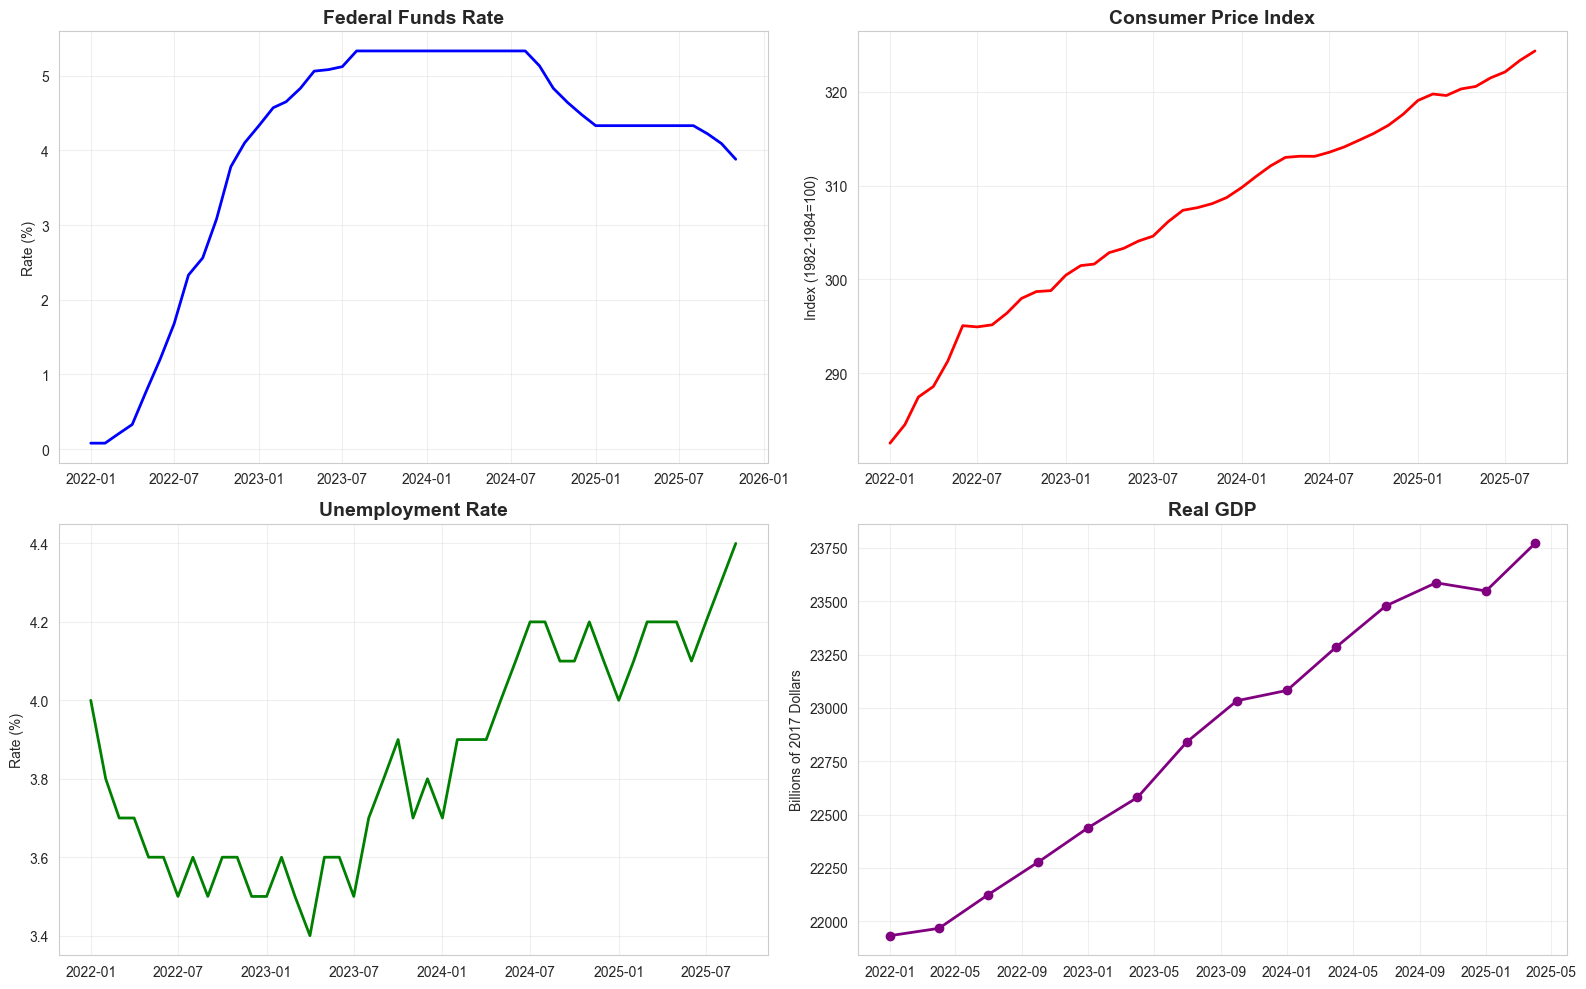

In [6]:
# Visualize macroeconomic trends
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Federal Funds Rate
axes[0, 0].plot(fed_funds['date'], fed_funds['federal_funds_rate_percent'], linewidth=2, color='blue')
axes[0, 0].set_title('Federal Funds Rate', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Rate (%)')
axes[0, 0].grid(True, alpha=0.3)

# Consumer Price Index
axes[0, 1].plot(cpi['date'], cpi['cpi_index'], linewidth=2, color='red')
axes[0, 1].set_title('Consumer Price Index', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Index (1982-1984=100)')
axes[0, 1].grid(True, alpha=0.3)

# Unemployment Rate
axes[1, 0].plot(unemployment['date'], unemployment['unemployment_rate_percent'], linewidth=2, color='green')
axes[1, 0].set_title('Unemployment Rate', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Rate (%)')
axes[1, 0].grid(True, alpha=0.3)

# Real GDP
axes[1, 1].plot(gdp['date'], gdp['real_gdp_billions'], linewidth=2, color='purple', marker='o')
axes[1, 1].set_title('Real GDP', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Billions of 2017 Dollars')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Combine Internal and External Data

In [7]:
# Load monthly internal metrics
monthly_metrics = pd.read_csv('../data/synthetic/monthly_internal_metrics.csv')
monthly_metrics['year_month'] = pd.to_datetime(monthly_metrics['year_month'])

# Merge with FRED data
macro_data = fed_funds.merge(cpi, on='date', how='inner')
macro_data = macro_data.merge(unemployment, on='date', how='inner')
macro_data = macro_data.rename(columns={'date': 'year_month'})

# Merge with internal data
combined_data = monthly_metrics.merge(macro_data, on='year_month', how='inner')

print(f"Combined Dataset: {len(combined_data)} months")
print(f"\nColumns: {list(combined_data.columns)}")
combined_data.head()

Combined Dataset: 45 months

Columns: ['year_month', 'monthly_transaction_volume', 'monthly_revenue_usd', 'monthly_new_customers', 'avg_churn_rate_pct', 'avg_response_time_ms', 'avg_uptime_pct', 'avg_fraud_detection_rate_pct', 'avg_false_positive_rate_pct', 'federal_funds_rate_percent', 'cpi_index', 'unemployment_rate_percent']


,year_month,monthly_transaction_volume,monthly_revenue_usd,monthly_new_customers,avg_churn_rate_pct,avg_response_time_ms,avg_uptime_pct,avg_fraud_detection_rate_pct,avg_false_positive_rate_pct,federal_funds_rate_percent,cpi_index,unemployment_rate_percent
0,2022-01-01,31862,1593924.53,1547,2.459355,150.448387,99.465806,86.051613,3.101935,0.08,282.542,4.0
1,2022-02-01,29938,1497679.68,1373,2.534286,150.850000,99.448571,86.566429,3.181429,0.08,284.525,3.8
2,2022-03-01,33708,1686253.31,1599,2.464516,145.919355,99.478710,85.343226,2.900000,0.20,287.467,3.7
3,2022-04-01,33507,1676059.44,1492,2.472667,150.100000,99.453333,84.310000,2.966333,0.33,288.582,3.7
4,2022-05-01,33845,1693004.04,1531,2.466774,158.341935,99.520000,83.955806,2.961290,0.77,291.299,3.6


## 4. Visualize Key Relationships

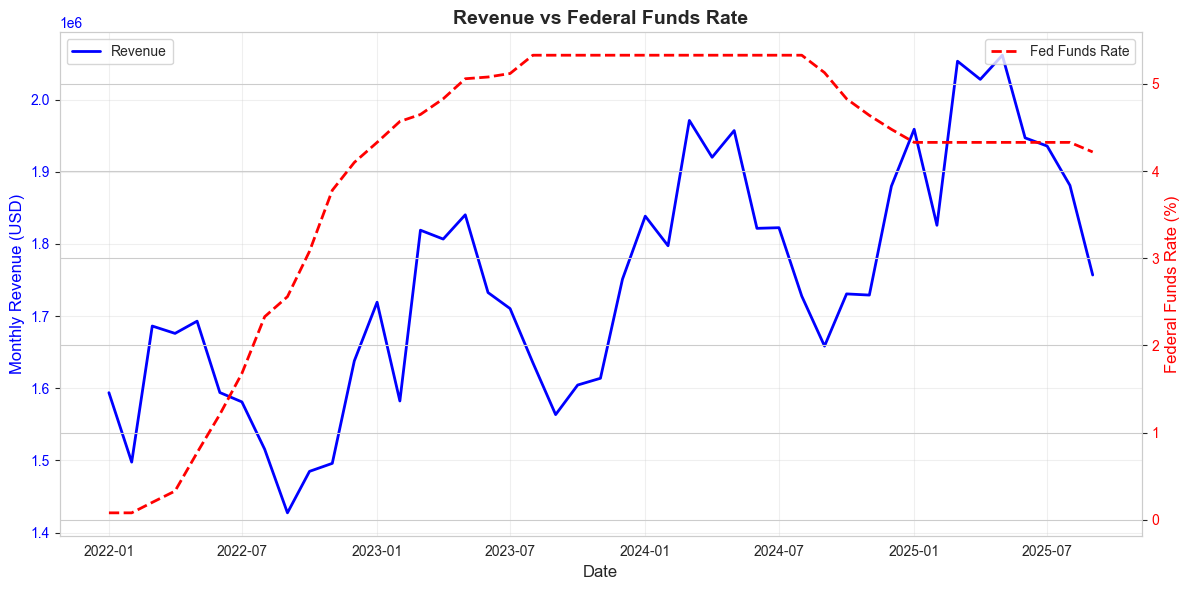

In [8]:
# Revenue vs Federal Funds Rate
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(combined_data['year_month'], combined_data['monthly_revenue_usd'], 
        label='Revenue', linewidth=2, color='blue')

ax2 = ax.twinx()
ax2.plot(combined_data['year_month'], combined_data['federal_funds_rate_percent'], 
         label='Fed Funds Rate', linewidth=2, color='red', linestyle='--')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Monthly Revenue (USD)', fontsize=12, color='blue')
ax2.set_ylabel('Federal Funds Rate (%)', fontsize=12, color='red')

ax.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Revenue vs Federal Funds Rate', fontsize=14, fontweight='bold')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

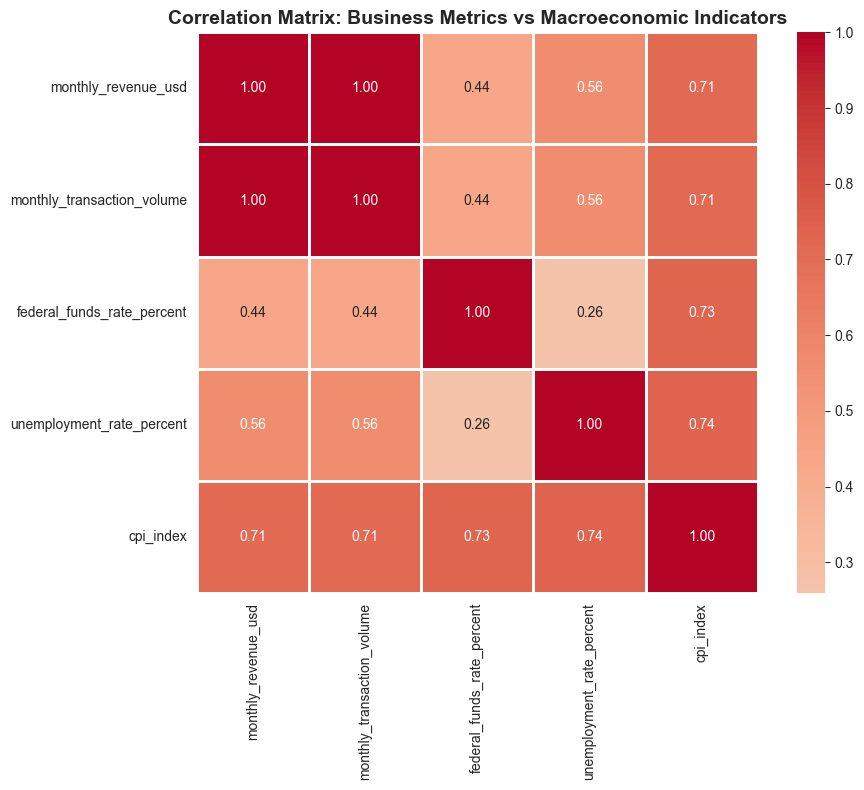

In [9]:
# Correlation analysis
correlation_cols = ['monthly_revenue_usd', 'monthly_transaction_volume', 
                   'federal_funds_rate_percent', 'unemployment_rate_percent', 'cpi_index']

corr_matrix = combined_data[correlation_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Matrix: Business Metrics vs Macroeconomic Indicators', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Model Performance Review

Revenue Prediction Model Results:

Number of predictions: 7

Prediction Error Statistics:
count      7.000000
mean      32.842396
std       96.990918
min      -60.776862
25%      -45.700517
50%        2.403724
75%      107.783996
max      164.102954
Name: prediction_error, dtype: float64


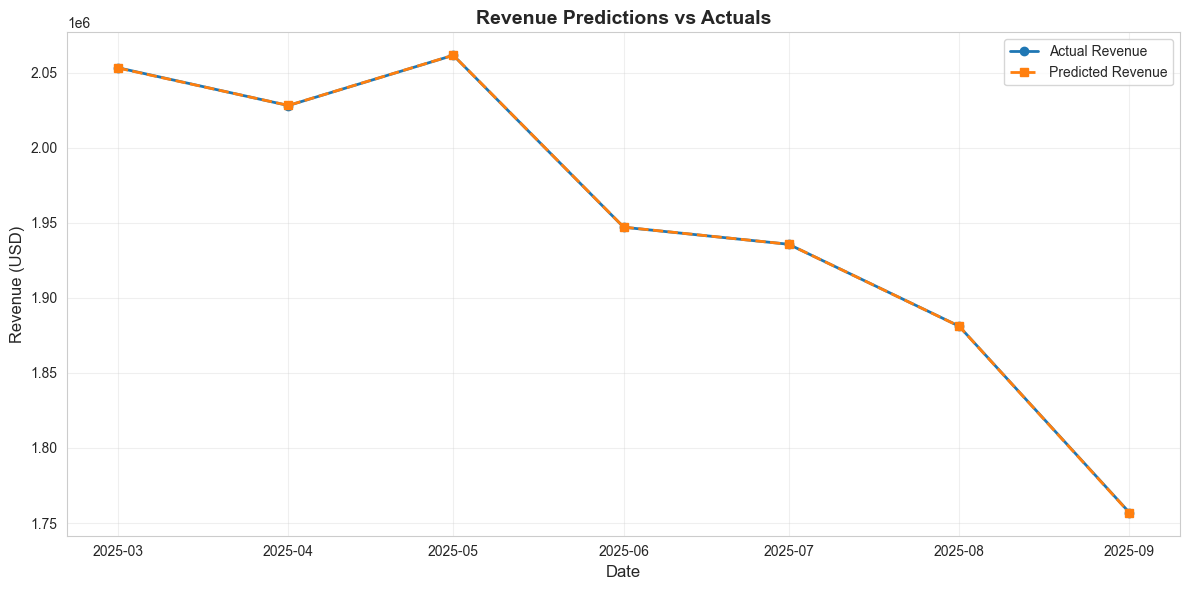

In [10]:
# Load revenue predictions
revenue_predictions = pd.read_csv('../data/fred/revenue_predictions.csv')
revenue_predictions['year_month'] = pd.to_datetime(revenue_predictions['year_month'])

print("Revenue Prediction Model Results:")
print(f"\nNumber of predictions: {len(revenue_predictions)}")
print(f"\nPrediction Error Statistics:")
print(revenue_predictions['prediction_error'].describe())

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(revenue_predictions['year_month'], revenue_predictions['actual_revenue'], 
         label='Actual Revenue', linewidth=2, marker='o')
plt.plot(revenue_predictions['year_month'], revenue_predictions['predicted_revenue'], 
         label='Predicted Revenue', linewidth=2, marker='s', linestyle='--')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.title('Revenue Predictions vs Actuals', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Fraud Detection Model Results:

Number of predictions: 4292

Actual fraud cases: 60
Predicted fraud cases: 42


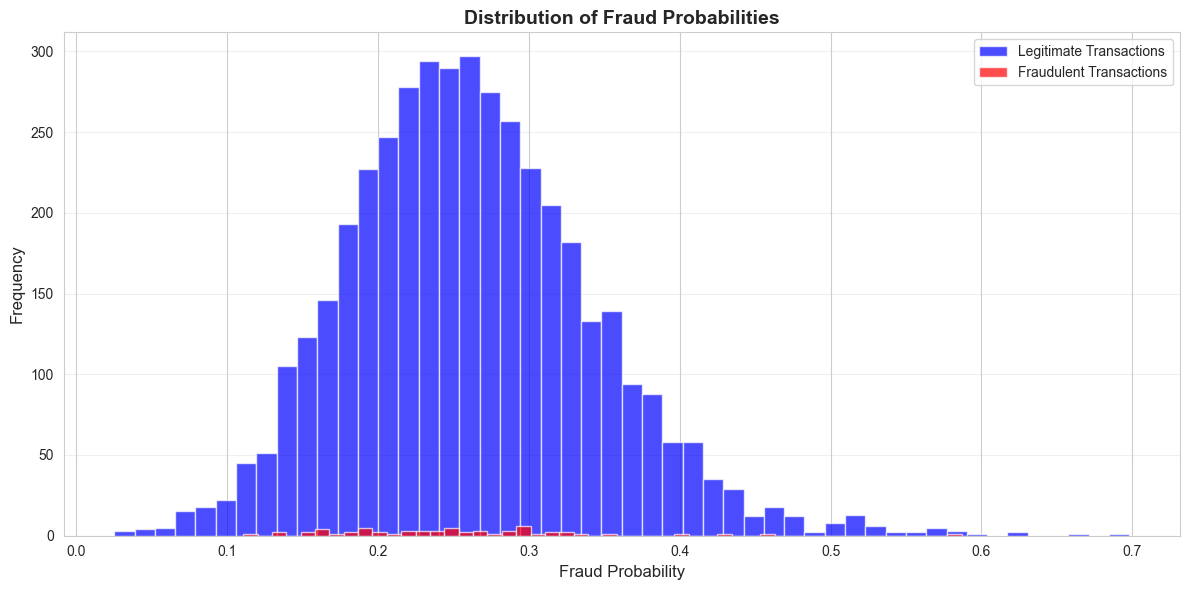

In [11]:
# Load fraud predictions
fraud_predictions = pd.read_csv('../data/synthetic/fraud_predictions.csv')

print("Fraud Detection Model Results:")
print(f"\nNumber of predictions: {len(fraud_predictions)}")
print(f"\nActual fraud cases: {fraud_predictions['actual_fraud'].sum()}")
print(f"Predicted fraud cases: {fraud_predictions['predicted_fraud'].sum()}")

# Fraud probability distribution
plt.figure(figsize=(12, 6))
plt.hist(fraud_predictions[fraud_predictions['actual_fraud']==0]['fraud_probability'], 
         bins=50, alpha=0.7, label='Legitimate Transactions', color='blue')
plt.hist(fraud_predictions[fraud_predictions['actual_fraud']==1]['fraud_probability'], 
         bins=50, alpha=0.7, label='Fraudulent Transactions', color='red')
plt.xlabel('Fraud Probability', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Fraud Probabilities', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## Next Steps

Now that you've explored the basics, here are some ideas for further analysis:

1. **Time Series Analysis**
   - Decompose revenue into trend, seasonality, and residuals
   - Build ARIMA or Prophet models for forecasting
   - Analyze autocorrelation in transaction patterns

2. **Feature Engineering**
   - Create lagged features for macroeconomic indicators
   - Engineer rolling window statistics
   - Build customer behavior profiles

3. **Advanced Modeling**
   - Try ensemble methods (XGBoost, LightGBM)
   - Implement deep learning models (LSTM, Transformers)
   - Add SHAP values for model interpretability

4. **Business Insights**
   - Segment customers by behavior and fraud risk
   - Analyze the impact of economic events on business metrics
   - Develop early warning systems for revenue decline

Happy analyzing!